1.. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
diamonds = sns.load_dataset('diamonds')


In [4]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
model = smf.ols('price ~ carat + cut + color + clarity', data=diamonds)

In [8]:
results = model.fit()
residuals = results.resid

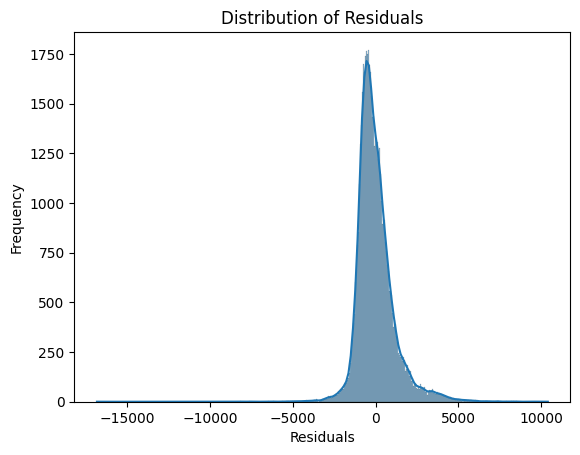

In [11]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



2.Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:

def calculate_regression_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)

  print(f"Mean Squared Error (MSE): {mse}")


3.Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity

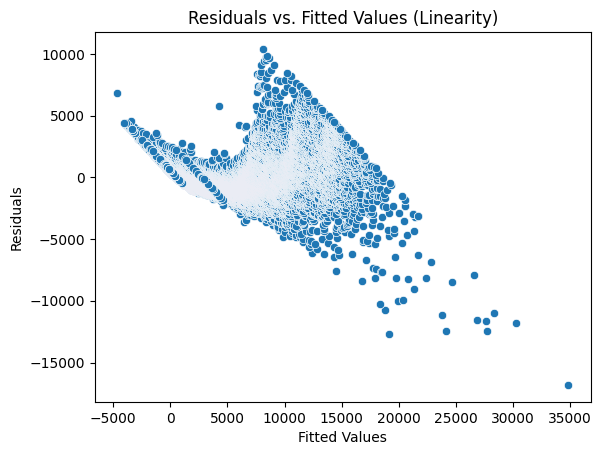

In [23]:
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.title('Residuals vs. Fitted Values (Linearity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

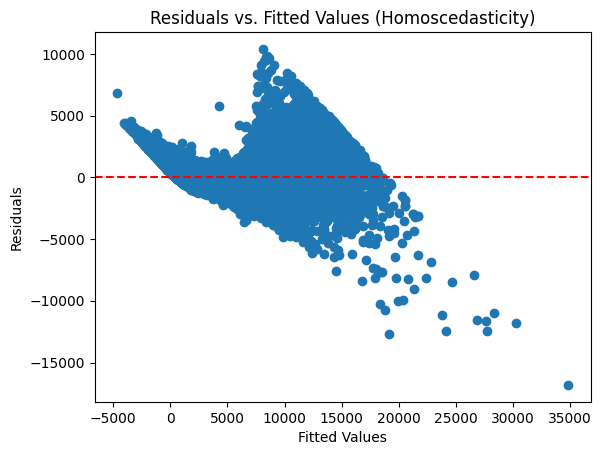

In [24]:
# 2. Homoscedasticity
# Residuals plot
plt.scatter(results.fittedvalues, results.resid)
plt.title('Residuals vs. Fitted Values (Homoscedasticity)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()

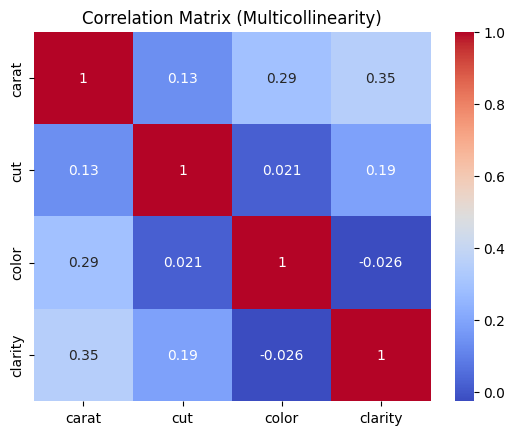

In [26]:
for col in ['cut', 'color', 'clarity']:
    diamonds[col] = diamonds[col].astype('category').cat.codes

corr_matrix = diamonds[['carat', 'cut', 'color', 'clarity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Multicollinearity)')
plt.show()

4.Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [29]:
from sklearn.pipeline import Pipeline
!pip install scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [30]:
diamonds = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)

In [31]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_1,cut_2,cut_3,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [32]:
# Define features and target variable
X = diamonds.drop('price', axis=1)
y = diamonds['price']


In [34]:
X

,carat,depth,table,x,y,z,cut_1,cut_2,cut_3,cut_4,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [35]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train

,carat,depth,table,x,y,z,cut_1,cut_2,cut_3,cut_4,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
26546,2.01,58.1,64.0,8.23,8.19,4.77,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
9159,1.01,60.0,60.0,6.57,6.49,3.92,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
14131,1.10,62.5,58.0,6.59,6.54,4.10,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
15757,1.50,61.5,65.0,7.21,7.17,4.42,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
24632,1.52,62.1,57.0,7.27,7.32,4.53,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
44732,0.47,61.0,55.0,5.03,5.01,3.06,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
38158,0.33,60.3,58.0,4.49,4.46,2.70,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
860,0.90,62.8,59.0,6.13,6.03,3.82,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [38]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


In [39]:
models

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(random_state=42)}

In [40]:
# Create a pipeline with feature scaling
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)          # Regression model
    ])


In [41]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [42]:
 y_pred = pipeline.predict(X_test)

In [43]:
y_pred

array([ 560.56, 2371.68, 1220.34, ...,  774.25, 9606.77, 4007.21])

In [45]:
 # Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model: {name}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("-" * 30)

Model: Random Forest
Mean Squared Error (MSE): 310387.6318807841
R-squared (R2): 0.9804748620450668
------------------------------


5.Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [47]:
model = smf.ols('price ~ carat', data=diamonds)
results = model.fit()
print("Coefficients:", results.params)
print("Intercept:", results.params['Intercept'])
print("R-squared:", results.rsquared)

Coefficients: Intercept   -2256.360580
carat        7756.425618
dtype: float64
Intercept: -2256.360580045407
R-squared: 0.8493305264354858


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

In [48]:
tips = sns.load_dataset('tips')

In [50]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [52]:
model = smf.ols('tip ~ total_bill', data=tips)  # tip is predicted by total_bill
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           6.69e-34
Time:                        14:46:29   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

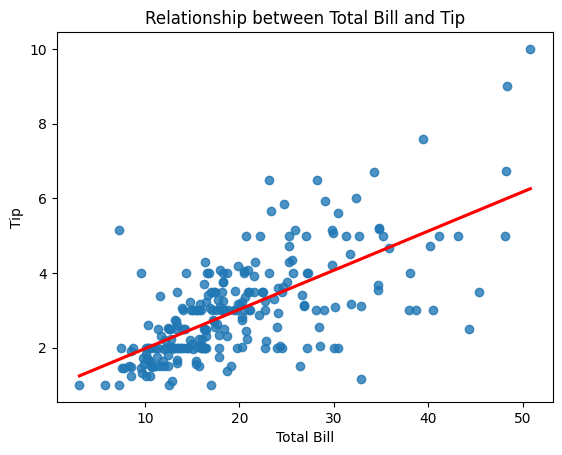

In [53]:
sns.regplot(x='total_bill', y='tip', data=tips, ci=None, line_kws={'color': 'red'})  # ci=None removes confidence interval
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

In [54]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 5 + np.random.randn(100, 1) * 2

In [55]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [56]:
y

array([[12.66489651],
       [23.41627143],
       [19.82340039],
       [12.99803185],
       [ 7.68102903],
       [ 8.83411555],
       [ 9.11746033],
       [21.28698248],
       [15.40531303],
       [18.15793747],
       [ 7.24249412],
       [25.05569926],
       [20.58933241],
       [10.27331708],
       [ 8.83065444],
       [10.60538018],
       [ 9.68073867],
       [14.83980434],
       [12.85468407],
       [ 7.89755291],
       [17.82929845],
       [ 8.31198776],
       [10.85311988],
       [11.8580626 ],
       [11.2906582 ],
       [19.86222858],
       [ 8.30804661],
       [13.68013423],
       [16.52571995],
       [ 6.73710997],
       [20.92326884],
       [ 8.7596381 ],
       [ 6.81613264],
       [23.82881891],
       [20.47509823],
       [21.11491921],
       [11.2127358 ],
       [11.87992651],
       [18.2999386 ],
       [14.40614456],
       [ 7.37134116],
       [12.56618213],
       [ 7.97341605],
       [24.69027411],
       [11.75766353],
       [16

In [57]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [58]:
X_new = np.array([[3], [7]])  # New values to predict for
y_pred = model.predict(X_new)

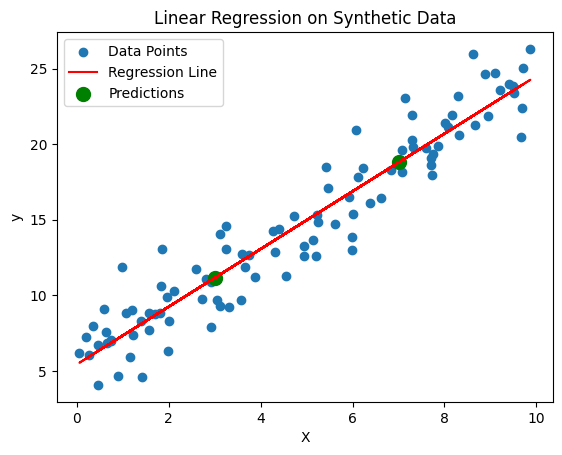

In [59]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(X_new, y_pred, color='green', marker='o', s=100, label='Predictions')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [60]:
print("Coefficients:", model.coef_)

Coefficients: [[1.90804535]]


In [61]:
print("Intercept:", model.intercept_)


Intercept: [5.43019232]


8.Write a Python script that pickles a trained linear regression model and saves it to a file.

In [63]:
import pickle
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [64]:
print(f"Model saved to {filename}")

Model saved to linear_regression_model.pkl


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

In [65]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 5

In [68]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [67]:
y

array([[ 44.72749903],
       [212.79793092],
       [134.58164831],
       [ 84.70030609],
       [ 13.45056301],
       [ 16.33225654],
       [ 14.80671979],
       [178.44615638],
       [ 91.25883381],
       [124.0067472 ],
       [ 10.2792897 ],
       [223.88607538],
       [165.91662825],
       [ 22.95409007],
       [ 17.5522005 ],
       [ 22.0728031 ],
       [ 29.1296703 ],
       [ 74.17824472],
       [ 53.31310962],
       [ 23.38218189],
       [ 99.70898118],
       [ 14.38179961],
       [ 30.85960587],
       [ 41.66211968],
       [ 53.20521192],
       [149.7523103 ],
       [ 17.25056474],
       [ 69.30305834],
       [ 92.15701279],
       [  8.84529483],
       [106.47942448],
       [ 16.80430813],
       [  9.08564169],
       [213.1710891 ],
       [210.86414958],
       [159.82060555],
       [ 32.9974738 ],
       [ 22.15434235],
       [118.20015289],
       [ 58.45915507],
       [ 11.46625435],
       [ 63.05195158],
       [ 11.98228378],
       [201

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [71]:
X_poly

array([[3.74540119e+00, 1.40280301e+01],
       [9.50714306e+00, 9.03857692e+01],
       [7.31993942e+00, 5.35815131e+01],
       [5.98658484e+00, 3.58391981e+01],
       [1.56018640e+00, 2.43418162e+00],
       [1.55994520e+00, 2.43342904e+00],
       [5.80836122e-01, 3.37370600e-01],
       [8.66176146e+00, 7.50261116e+01],
       [6.01115012e+00, 3.61339257e+01],
       [7.08072578e+00, 5.01366775e+01],
       [2.05844943e-01, 4.23721405e-02],
       [9.69909852e+00, 9.40725121e+01],
       [8.32442641e+00, 6.92960750e+01],
       [2.12339111e+00, 4.50878979e+00],
       [1.81824967e+00, 3.30603187e+00],
       [1.83404510e+00, 3.36372142e+00],
       [3.04242243e+00, 9.25633424e+00],
       [5.24756432e+00, 2.75369313e+01],
       [4.31945019e+00, 1.86576499e+01],
       [2.91229140e+00, 8.48144121e+00],
       [6.11852895e+00, 3.74363965e+01],
       [1.39493861e+00, 1.94585372e+00],
       [2.92144649e+00, 8.53484957e+00],
       [3.66361843e+00, 1.34221000e+01],
       [4.560699

In [72]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [73]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

In [74]:
X_plot_poly

array([[0.00000000e+00, 0.00000000e+00],
       [1.01010101e-01, 1.02030405e-02],
       [2.02020202e-01, 4.08121620e-02],
       [3.03030303e-01, 9.18273646e-02],
       [4.04040404e-01, 1.63248648e-01],
       [5.05050505e-01, 2.55076013e-01],
       [6.06060606e-01, 3.67309458e-01],
       [7.07070707e-01, 4.99948985e-01],
       [8.08080808e-01, 6.52994592e-01],
       [9.09090909e-01, 8.26446281e-01],
       [1.01010101e+00, 1.02030405e+00],
       [1.11111111e+00, 1.23456790e+00],
       [1.21212121e+00, 1.46923783e+00],
       [1.31313131e+00, 1.72431385e+00],
       [1.41414141e+00, 1.99979594e+00],
       [1.51515152e+00, 2.29568411e+00],
       [1.61616162e+00, 2.61197837e+00],
       [1.71717172e+00, 2.94867871e+00],
       [1.81818182e+00, 3.30578512e+00],
       [1.91919192e+00, 3.68329762e+00],
       [2.02020202e+00, 4.08121620e+00],
       [2.12121212e+00, 4.49954086e+00],
       [2.22222222e+00, 4.93827160e+00],
       [2.32323232e+00, 5.39740843e+00],
       [2.424242

In [75]:
y_plot = model.predict(X_plot_poly)

In [76]:
y_plot

array([[  7.80701359],
       [  7.99414877],
       [  8.22446755],
       [  8.49796995],
       [  8.81465595],
       [  9.17452556],
       [  9.57757878],
       [ 10.02381561],
       [ 10.51323605],
       [ 11.04584009],
       [ 11.62162775],
       [ 12.24059901],
       [ 12.90275388],
       [ 13.60809237],
       [ 14.35661445],
       [ 15.14832015],
       [ 15.98320946],
       [ 16.86128237],
       [ 17.7825389 ],
       [ 18.74697903],
       [ 19.75460277],
       [ 20.80541012],
       [ 21.89940108],
       [ 23.03657565],
       [ 24.21693382],
       [ 25.44047561],
       [ 26.707201  ],
       [ 28.01711   ],
       [ 29.37020261],
       [ 30.76647883],
       [ 32.20593866],
       [ 33.68858209],
       [ 35.21440914],
       [ 36.78341979],
       [ 38.39561405],
       [ 40.05099192],
       [ 41.7495534 ],
       [ 43.49129849],
       [ 45.27622718],
       [ 47.10433949],
       [ 48.9756354 ],
       [ 50.89011492],
       [ 52.84777806],
       [ 54

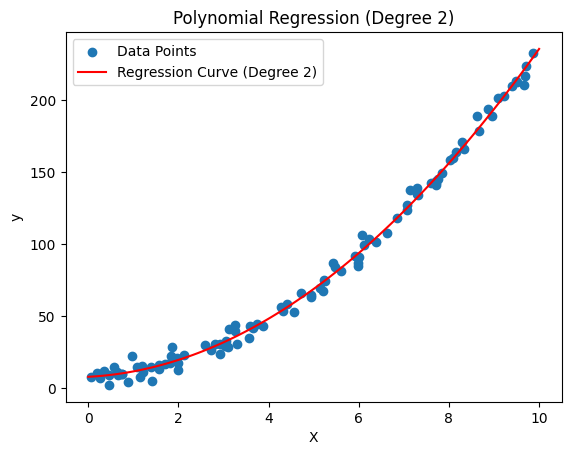

In [77]:
plt.scatter(X, y, label='Data Points')
plt.plot(X_plot, y_plot, color='red', label='Regression Curve (Degree 2)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

10.Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [79]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 5 + np.random.randn(100, 1) * 2



In [81]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [82]:
y

array([[12.66489651],
       [23.41627143],
       [19.82340039],
       [12.99803185],
       [ 7.68102903],
       [ 8.83411555],
       [ 9.11746033],
       [21.28698248],
       [15.40531303],
       [18.15793747],
       [ 7.24249412],
       [25.05569926],
       [20.58933241],
       [10.27331708],
       [ 8.83065444],
       [10.60538018],
       [ 9.68073867],
       [14.83980434],
       [12.85468407],
       [ 7.89755291],
       [17.82929845],
       [ 8.31198776],
       [10.85311988],
       [11.8580626 ],
       [11.2906582 ],
       [19.86222858],
       [ 8.30804661],
       [13.68013423],
       [16.52571995],
       [ 6.73710997],
       [20.92326884],
       [ 8.7596381 ],
       [ 6.81613264],
       [23.82881891],
       [20.47509823],
       [21.11491921],
       [11.2127358 ],
       [11.87992651],
       [18.2999386 ],
       [14.40614456],
       [ 7.37134116],
       [12.56618213],
       [ 7.97341605],
       [24.69027411],
       [11.75766353],
       [16

In [83]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [84]:
print("Coefficient:", model.coef_[0][0])

Coefficient: 1.908045354575393


In [85]:
print("Intercept:", model.intercept_[0])

Intercept: 5.430192315093501


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

In [86]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**3 - 5 * X**2 + 3 * X + 10 + np.random.randn(100, 1) * 10

In [87]:
degrees = [1, 2, 3, 4, 5]

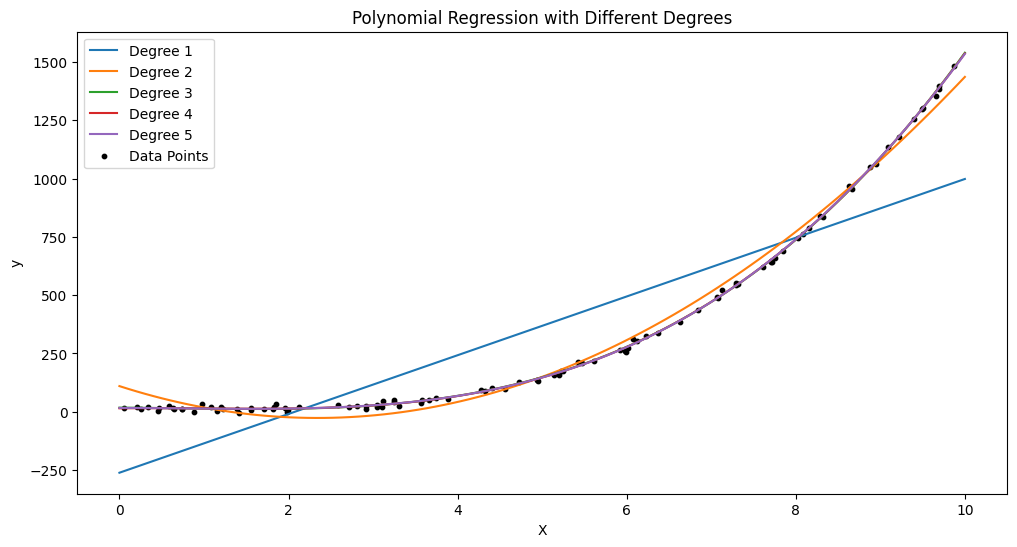

Degree 1: MSE = 35251.20
Degree 2: MSE = 1424.19
Degree 3: MSE = 77.25
Degree 4: MSE = 76.35
Degree 5: MSE = 76.15


In [89]:
plt.figure(figsize=(12, 6))
mse_values = []  # Initialize mse_values as an empty list before the loop
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on the same data
    y_pred = model.predict(X_poly)

    # Calculate and store MSE
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot the regression curve
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, label=f'Degree {degree}')

# Plot data points
plt.scatter(X, y, color='black', s=10, label='Data Points')

plt.title('Polynomial Regression with Different Degrees')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print MSE values
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')

.

12.Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 2), columns=['feature1', 'feature2'])
y = 3 * X['feature1'] + 2 * X['feature2'] + 5 + np.random.randn(100)


In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y, model.predict(X)))

Coefficients: [3.33866677 2.35494603]
Intercept: 4.772272264101704
R-squared: 0.5923101674075847


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

In [9]:
import matplotlib.pyplot as plt



np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 5 + np.random.randn(100, 1) * 2

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Values for plotting the line
y_plot = model.predict(X_plot)

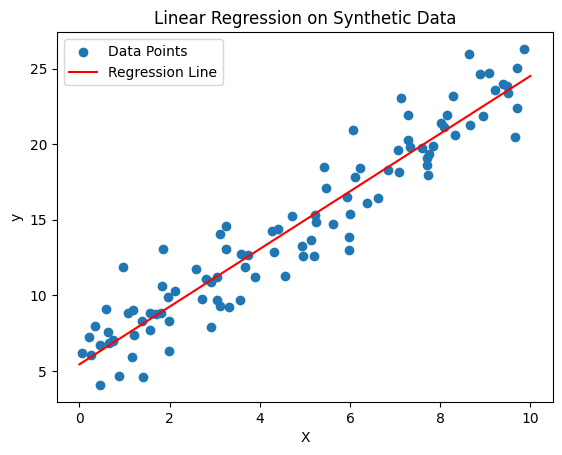

In [12]:
plt.scatter(X, y, label='Data Points')  # Scatter plot of data points
plt.plot(X_plot, y_plot, color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

14.Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.




In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                          for i in range(len(features))]
    return vif_data



In [14]:
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6],
    'feature3': [3, 4, 5, 6, 7],
    'feature4': [4, 5, 6, 7, 8]
})

features_to_check = ['feature1', 'feature2', 'feature3', 'feature4']
vif_results = calculate_vif(data, features_to_check)
print(vif_results)

    feature  VIF
0  feature1  inf
1  feature2  inf
2  feature3  inf
3  feature4  inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

In [15]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 0.5 * X**4 - 2 * X**3 + 3 * X**2 + 2 * X + 5 + np.random.randn(100, 1) * 10

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [19]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

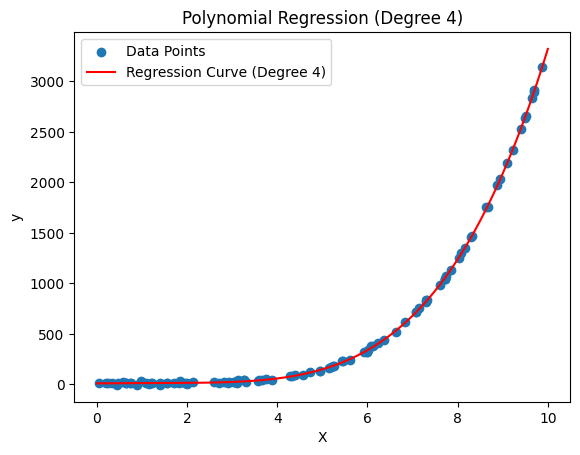

In [20]:
plt.scatter(X, y, label='Data Points')
plt.plot(X_plot, y_plot, color='red', label='Regression Curve (Degree 4)')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

16.Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(42)
num_samples = 100
num_features = 3
X = pd.DataFrame(np.random.rand(num_samples, num_features),
                 columns=[f'feature_{i}' for i in range(1, num_features + 1)])
y = 2 * X['feature_1'] + 3 * X['feature_2'] - 1 * X['feature_3'] + 5 + np.random.randn(num_samples)

In [22]:
X

,feature_1,feature_2,feature_3
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825
...,...,...,...
95,0.035942,0.465598,0.542645
96,0.286541,0.590833,0.030500
97,0.037348,0.822601,0.360191
98,0.127061,0.522243,0.769994


In [23]:
y

,0
0,7.914801
1,5.857778
2,9.257525
3,6.141908
4,5.094935
...,...
95,6.717697
96,7.939202
97,7.810653
98,6.038610


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [28]:
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.286185303676633


17.Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**3 - 5 * X**2 + 3 * X + 10 + np.random.randn(100, 1) * 10

In [30]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [31]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [32]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

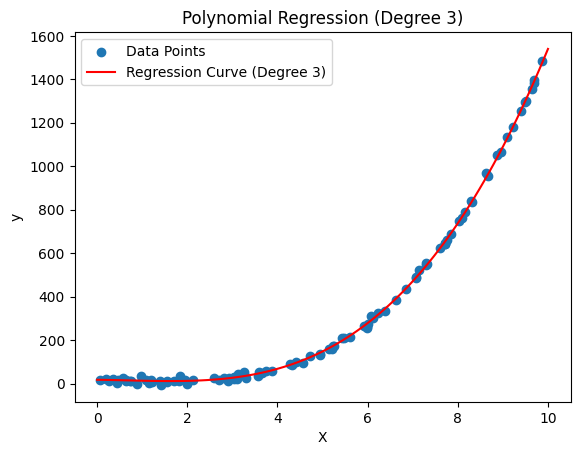

In [33]:
plt.scatter(X, y, label='Data Points')
plt.plot(X_plot, y_plot, color='red', label='Regression Curve (Degree 3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
num_samples = 100
num_features = 5
X = pd.DataFrame(np.random.rand(num_samples, num_features),
                 columns=[f'feature_{i}' for i in range(1, num_features + 1)])
y = (2 * X['feature_1'] + 3 * X['feature_2'] - 1 * X['feature_3'] +
     0.5 * X['feature_4'] + 2 * X['feature_5'] + 5 + np.random.randn(num_samples))


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.3058676873739973


In [40]:
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"feature_{i + 1}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

Coefficients:
feature_1: 1.6530
feature_2: 2.7661
feature_3: -0.3521
feature_4: 0.6456
feature_5: 1.5544
Intercept: 5.1460


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

In [41]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 5 + np.random.randn(100, 1) * 2

In [42]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [43]:
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

In [44]:
y_plot

array([[ 5.43019232],
       [ 5.62292417],
       [ 5.81565602],
       [ 6.00838788],
       [ 6.20111973],
       [ 6.39385159],
       [ 6.58658344],
       [ 6.77931529],
       [ 6.97204715],
       [ 7.164779  ],
       [ 7.35751086],
       [ 7.55024271],
       [ 7.74297456],
       [ 7.93570642],
       [ 8.12843827],
       [ 8.32117013],
       [ 8.51390198],
       [ 8.70663383],
       [ 8.89936569],
       [ 9.09209754],
       [ 9.2848294 ],
       [ 9.47756125],
       [ 9.6702931 ],
       [ 9.86302496],
       [10.05575681],
       [10.24848867],
       [10.44122052],
       [10.63395237],
       [10.82668423],
       [11.01941608],
       [11.21214794],
       [11.40487979],
       [11.59761164],
       [11.7903435 ],
       [11.98307535],
       [12.17580721],
       [12.36853906],
       [12.56127091],
       [12.75400277],
       [12.94673462],
       [13.13946647],
       [13.33219833],
       [13.52493018],
       [13.71766204],
       [13.91039389],
       [14

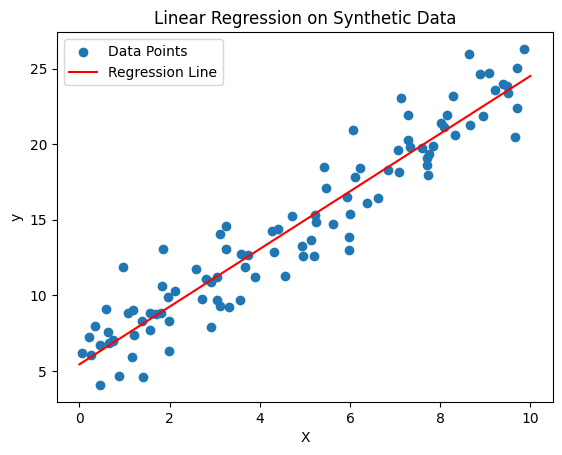

In [45]:
plt.scatter(X, y, label='Data Points')  # Scatter plot of data points
plt.plot(X_plot, y_plot, color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [46]:
np.random.seed(42)
num_features = 3
X = pd.DataFrame(np.random.rand(num_samples, num_features),
                 columns=[f'feature_{i}' for i in range(1, num_features + 1)])
y = 2 * X['feature_1'] + 3 * X['feature_2'] - 1 * X['feature_3'] + 5 + np.random.randn(num_samples)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.2861853036766333


In [51]:
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"feature_{i + 1}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

Coefficients:
feature_1: 2.1059
feature_2: 2.9246
feature_3: -0.3139
Intercept: 4.9150


21.Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [52]:
import joblib
model = LinearRegression()
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])
model.fit(X, y)


LinearRegression()

In [53]:
filename = 'linear_regression_model.joblib'
joblib.dump(model, filename)
print(f"Model saved to {filename}")


Model saved to linear_regression_model.joblib


In [55]:
loaded_model = joblib.load(filename)

X_new = np.array([[6]])
y_pred = loaded_model.predict(X_new)
print(f"Prediction for X_new: {y_pred[0]}")

Prediction for X_new: 5.8


22.Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.




In [56]:
tips = sns.load_dataset('tips')

In [57]:
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [58]:
tips

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,True,False,True
240,27.18,2.00,2,True,False,False,True,False,True
241,22.67,2.00,2,False,False,False,True,False,True
242,17.82,1.75,2,False,True,False,True,False,True


In [59]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [64]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.43730181943482505


In [65]:
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

Coefficients:
total_bill: 0.0947
size: 0.2335
sex_Female: -0.0288
smoker_No: 0.1924
day_Fri: 0.1797
day_Sat: -0.0061
day_Sun: 0.1289
time_Dinner: -0.0950
Intercept: 0.4791


23.Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [66]:
np.random.seed(42)
num_samples = 100
num_features = 5
X = pd.DataFrame(np.random.rand(num_samples, num_features),
                 columns=[f'feature_{i}' for i in range(1, num_features + 1)])
y = (2 * X['feature_1'] + 3 * X['feature_2'] - 1 * X['feature_3'] +
     0.5 * X['feature_4'] + 2 * X['feature_5'] + 5 + np.random.randn(num_samples))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn.linear_model import LinearRegression, Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [72]:
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

linear_r2 = r2_score(y_test, linear_pred)
ridge_r2 = r2_score(y_test, ridge_pred)


In [76]:
linear_pred

array([ 8.18619674,  8.73953062,  8.32971808,  9.65921097,  8.42160584,
        9.2002898 ,  7.24978631,  8.66609754, 10.06898887,  8.7660939 ,
        8.60940128,  9.1069789 ,  8.35836443,  8.29311901,  8.58376761,
        7.38575426,  8.75613336,  8.93045572,  6.91421649,  8.42243218])

In [77]:
ridge_pred

array([8.20919027, 8.65271234, 8.29283701, 9.49395644, 8.3999215 ,
       9.07925084, 7.3895162 , 8.63019788, 9.81883012, 8.69251074,
       8.55961797, 8.9946968 , 8.31289435, 8.26671314, 8.55520883,
       7.49955403, 8.70735533, 8.85602952, 7.07681346, 8.37904669])

In [74]:
linear_r2

0.3058676873739973

In [75]:
ridge_r2

0.3182269427274935

In [73]:
print("Linear Regression:")
print(f"R-squared: {linear_r2:.4f}")
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

print("\nRidge Regression:")
print(f"R-squared: {ridge_r2:.4f}")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

Linear Regression:
R-squared: 0.3059
Coefficients: [ 1.65295867  2.76607667 -0.35209671  0.6455846   1.55435983]
Intercept: 5.14598474398699

Ridge Regression:
R-squared: 0.3182
Coefficients: [ 1.41277624  2.38960254 -0.33741257  0.61041057  1.34528148]
Intercept: 5.563207542364423


24.Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [78]:
np.random.seed(42)
num_samples = 100
num_features = 3
X = pd.DataFrame(np.random.rand(num_samples, num_features),
                 columns=[f'feature_{i}' for i in range(1, num_features + 1)])
y = 2 * X['feature_1'] + 3 * X['feature_2'] - 1 * X['feature_3'] + 5 + np.random.randn(num_samples)

In [79]:
X

,feature_1,feature_2,feature_3
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825
...,...,...,...
95,0.035942,0.465598,0.542645
96,0.286541,0.590833,0.030500
97,0.037348,0.822601,0.360191
98,0.127061,0.522243,0.769994


In [80]:
y

,0
0,7.914801
1,5.857778
2,9.257525
3,6.141908
4,5.094935
...,...
95,6.717697
96,7.939202
97,7.810653
98,6.038610


In [81]:
model = LinearRegression()


In [82]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [83]:
cv

KFold(n_splits=5, random_state=42, shuffle=True)

In [85]:
from sklearn.metrics import make_scorer, r2_score
scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))

In [86]:
scores

array([0.2861853 , 0.72485282, 0.58434419, 0.616741  , 0.40475947])

In [87]:
print("Cross-validation scores:", scores)
print("Average R-squared:", scores.mean())

Cross-validation scores: [0.2861853  0.72485282 0.58434419 0.616741   0.40475947]
Average R-squared: 0.5233765544615421


25.Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [88]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**3 - 5 * X**2 + 3 * X + 10 + np.random.randn(100, 1) * 10

In [89]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [90]:
y

array([[ 5.70477249e+01],
       [ 1.30222339e+03],
       [ 5.49396720e+02],
       [ 2.57996875e+02],
       [ 7.90848638e+00],
       [ 1.36758480e+01],
       [ 2.52265099e+01],
       [ 9.55388587e+02],
       [ 2.73691789e+02],
       [ 4.85549349e+02],
       [ 1.95771395e+01],
       [ 1.39685937e+03],
       [ 8.36895456e+02],
       [ 1.81067470e+01],
       [ 1.19177479e+01],
       [ 2.07084117e+01],
       [ 2.21484230e+01],
       [ 1.73785051e+02],
       [ 8.69305983e+01],
       [ 1.10953753e+01],
       [ 3.02246158e+02],
       [ 1.24947929e+01],
       [ 2.60094387e+01],
       [ 4.98813900e+01],
       [ 9.52534357e+01],
       [ 6.89222167e+02],
       [ 8.55009401e+00],
       [ 1.57151015e+02],
       [ 2.66503805e+02],
       [ 1.45556471e+01],
       [ 3.11035499e+02],
       [ 1.22394270e+01],
       [ 1.29617557e+01],
       [ 1.29625249e+03],
       [ 1.35435659e+03],
       [ 7.63819121e+02],
       [ 2.98758891e+01],
       [ 3.46562167e+01],
       [ 4.3

In [91]:
degrees = [1, 2, 3, 4, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
X_train

array([[9.21874235],
       [8.87212743],
       [1.99673782],
       [0.34388521],
       [9.86886937],
       [1.8340451 ],
       [1.22038235],
       [5.22732829],
       [7.08072578],
       [0.05522117],
       [9.69909852],
       [5.20068021],
       [3.25183322],
       [5.92414569],
       [5.61277198],
       [1.5599452 ],
       [1.40924225],
       [5.42696083],
       [8.08397348],
       [3.04242243],
       [1.84854456],
       [9.65632033],
       [8.66176146],
       [4.93795596],
       [5.14234438],
       [2.9122914 ],
       [6.23298127],
       [7.85175961],
       [8.28737509],
       [2.12339111],
       [4.56069984],
       [5.98658484],
       [5.24756432],
       [6.84233027],
       [6.01115012],
       [3.58465729],
       [0.58083612],
       [2.8093451 ],
       [3.04613769],
       [4.72214925],
       [0.88492502],
       [1.07891427],
       [5.97899979],
       [9.09320402],
       [9.69584628],
       [8.02196981],
       [3.11711076],
       [0.745

In [94]:
X_test

array([[0.6355835 ],
       [8.9482735 ],
       [7.72244769],
       [6.62522284],
       [2.58779982],
       [4.40152494],
       [2.92144649],
       [8.63103426],
       [0.20584494],
       [3.74540119],
       [4.31945019],
       [6.07544852],
       [8.15461428],
       [9.48885537],
       [1.19594246],
       [1.5601864 ],
       [7.71270347],
       [0.74044652],
       [8.32442641],
       [1.70524124]])

In [95]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

In [96]:
X_train

array([[9.21874235],
       [8.87212743],
       [1.99673782],
       [0.34388521],
       [9.86886937],
       [1.8340451 ],
       [1.22038235],
       [5.22732829],
       [7.08072578],
       [0.05522117],
       [9.69909852],
       [5.20068021],
       [3.25183322],
       [5.92414569],
       [5.61277198],
       [1.5599452 ],
       [1.40924225],
       [5.42696083],
       [8.08397348],
       [3.04242243],
       [1.84854456],
       [9.65632033],
       [8.66176146],
       [4.93795596],
       [5.14234438],
       [2.9122914 ],
       [6.23298127],
       [7.85175961],
       [8.28737509],
       [2.12339111],
       [4.56069984],
       [5.98658484],
       [5.24756432],
       [6.84233027],
       [6.01115012],
       [3.58465729],
       [0.58083612],
       [2.8093451 ],
       [3.04613769],
       [4.72214925],
       [0.88492502],
       [1.07891427],
       [5.97899979],
       [9.09320402],
       [9.69584628],
       [8.02196981],
       [3.11711076],
       [0.745

In [98]:
X_poly

array([[3.74540119e+00, 1.40280301e+01, 5.25406005e+01],
       [9.50714306e+00, 9.03857692e+01, 8.59310439e+02],
       [7.31993942e+00, 5.35815131e+01, 3.92213430e+02],
       [5.98658484e+00, 3.58391981e+01, 2.14554400e+02],
       [1.56018640e+00, 2.43418162e+00, 3.79777706e+00],
       [1.55994520e+00, 2.43342904e+00, 3.79601595e+00],
       [5.80836122e-01, 3.37370600e-01, 1.95957031e-01],
       [8.66176146e+00, 7.50261116e+01, 6.49858281e+02],
       [6.01115012e+00, 3.61339257e+01, 2.17206452e+02],
       [7.08072578e+00, 5.01366775e+01, 3.55004065e+02],
       [2.05844943e-01, 4.23721405e-02, 8.72209085e-03],
       [9.69909852e+00, 9.40725121e+01, 9.12418563e+02],
       [8.32442641e+00, 6.92960750e+01, 5.76850077e+02],
       [2.12339111e+00, 4.50878979e+00, 9.57392415e+00],
       [1.81824967e+00, 3.30603187e+00, 6.01119136e+00],
       [1.83404510e+00, 3.36372142e+00, 6.16921679e+00],
       [3.04242243e+00, 9.25633424e+00, 2.81616789e+01],
       [5.24756432e+00, 2.75369

In [99]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test_poly)

In [101]:
y_pred

array([[  14.11342616],
       [1071.29273595],
       [ 657.17499853],
       [ 389.98252234],
       [  18.69603216],
       [  92.887982  ],
       [  24.87467843],
       [ 951.64289123],
       [  14.62844257],
       [  53.20949665],
       [  86.95282233],
       [ 288.84937294],
       [ 788.52254067],
       [1296.13803336],
       [  12.720486  ],
       [  12.27431371],
       [ 654.39050273],
       [  13.86552434],
       [ 844.4205034 ],
       [  12.35742243]])

In [102]:
r2 = r2_score(y_test, y_pred)
print(f"Degree {degree}: R-squared = {r2:.4f}")

Degree 5: R-squared = 0.9996
